In [2]:
%pip install seaborn
%pip install folium

Note: you may need to restart the kernel to use updated packages.

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/fc/ab/d1f47c48a14e17cd487c8b467b573291fae75477b067241407e7889a3692/folium-0.19.4-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/f8/9d/91cddd38bd00170aad1a4b198c47b4ed716be45c234e09b835af41f4e717/branca-0.8.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/110.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/110.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/110.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/110.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/110.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/110.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/110.5 kB ? eta -:--:--
   ---------------------------

In [4]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [8]:
%pip install js

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for fanstatic from https://files.pythonhosted.org/packages/c0/00/ba3d0f4b11a32cc45de86e4d1e26ea1d2a829a121615b64c65bd0943f385/fanstatic-1.4-py3-none-any.whl.metadata
  Obtaining dependency information for WebOb>=1.2 from https://files.pythonhosted.org/packages/50/bd/c336448be43d40be28e71f2e0f3caf7ccb28e2755c58f4c02c065bfe3e8e/WebOb-1.8.9-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/53.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/53.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/53.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/53.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/53.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/53.9 kB ? eta -:--:--
   -------------------------------------- - 51.2/53.9 kB 2.6 MB/s eta 0:0

In [16]:
import requests
import pandas as pd
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

response = requests.get(URL)
if response.status_code == 200:
    df = pd.read_csv(io.StringIO(response.text))
    print(df.head())  # Verify the data is loaded
else:
    print("Failed to fetch data:", response.status_code)


        Date  Year Month  Recession  Consumer_Confidence  Seasonality_Weight  \
0  1/31/1980  1980   Jan          1               108.24                0.50   
1  2/29/1980  1980   Feb          1                98.75                0.75   
2  3/31/1980  1980   Mar          1               107.48                0.20   
3  4/30/1980  1980   Apr          1               115.01                1.00   
4  5/31/1980  1980   May          1                98.72                0.20   

       Price  Advertising_Expenditure  Competition     GDP  Growth_Rate  \
0  27483.571                     1558            7  60.223     0.010000   
1  24308.678                     3048            4  45.986    -0.309594   
2  28238.443                     3137            3  35.141    -0.308614   
3  32615.149                     1653            7  45.673     0.230596   
4  23829.233                     1319            4  52.997     0.138197   

   unemployment_rate  Automobile_Sales     Vehicle_Type        City 

In [20]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [22]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

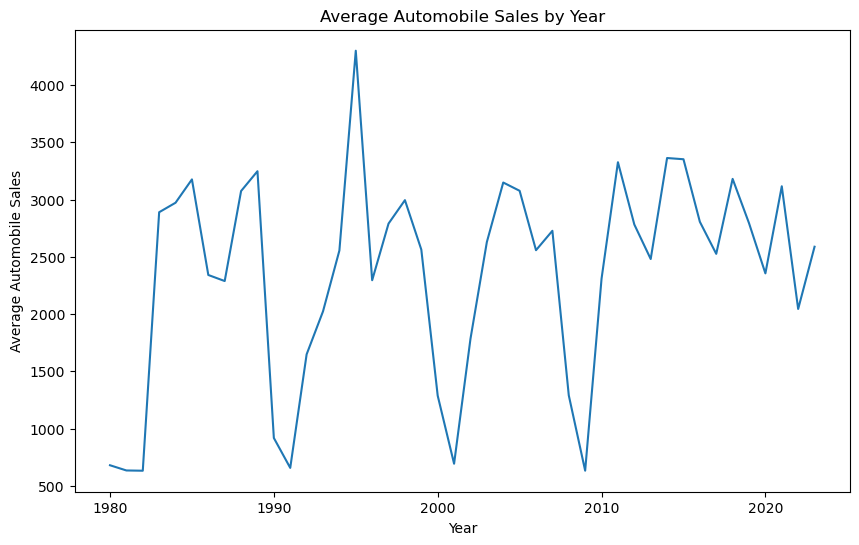

In [24]:
#create data for plotting
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()

#create figure
plt.figure(figsize=(10, 6))
df_line.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales by Year')
plt.show()

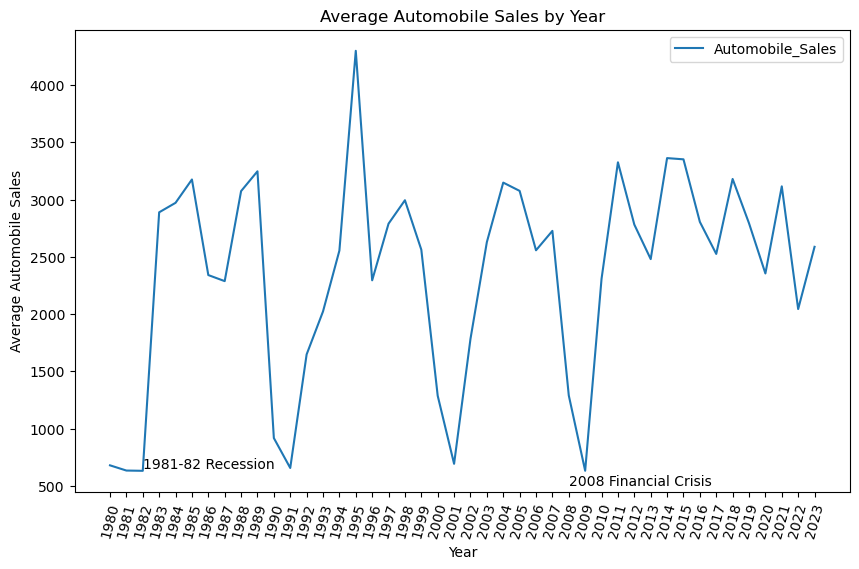

In [26]:
plt.figure(figsize=(10, 6))
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
df_line.plot(kind='line')
plt.xticks(list(range(1980, 2024)), rotation=75)
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales by Year')
plt.text(1982, 650, '1981-82 Recession')
plt.text(2008, 500, '2008 Financial Crisis')
plt.legend()
plt.show()

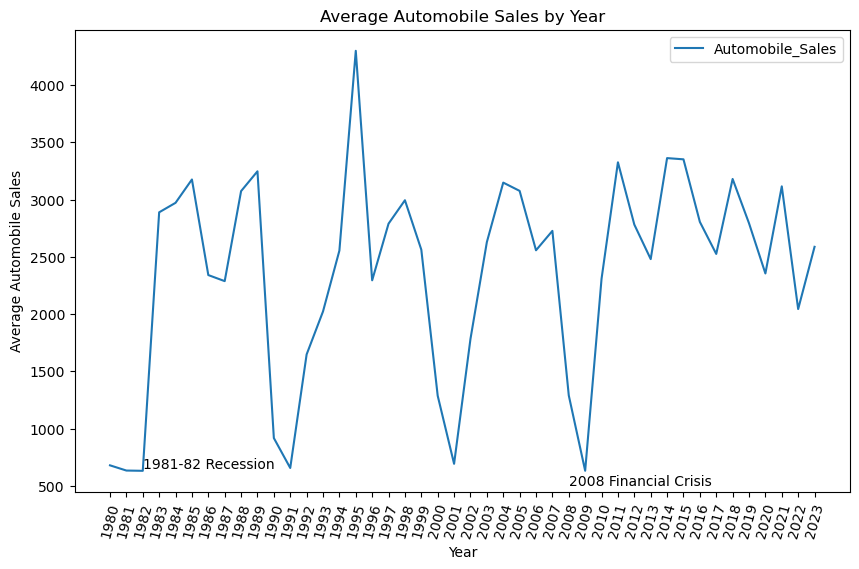

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
df_line.plot(kind='line')
plt.xticks(list(range(1980, 2024)), rotation=75)
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales by Year')
plt.text(1982, 650, '1981-82 Recession')
plt.text(2008, 500, '2008 Financial Crisis')
plt.legend()
plt.savefig('Line_Plot_1.png')
plt.show()


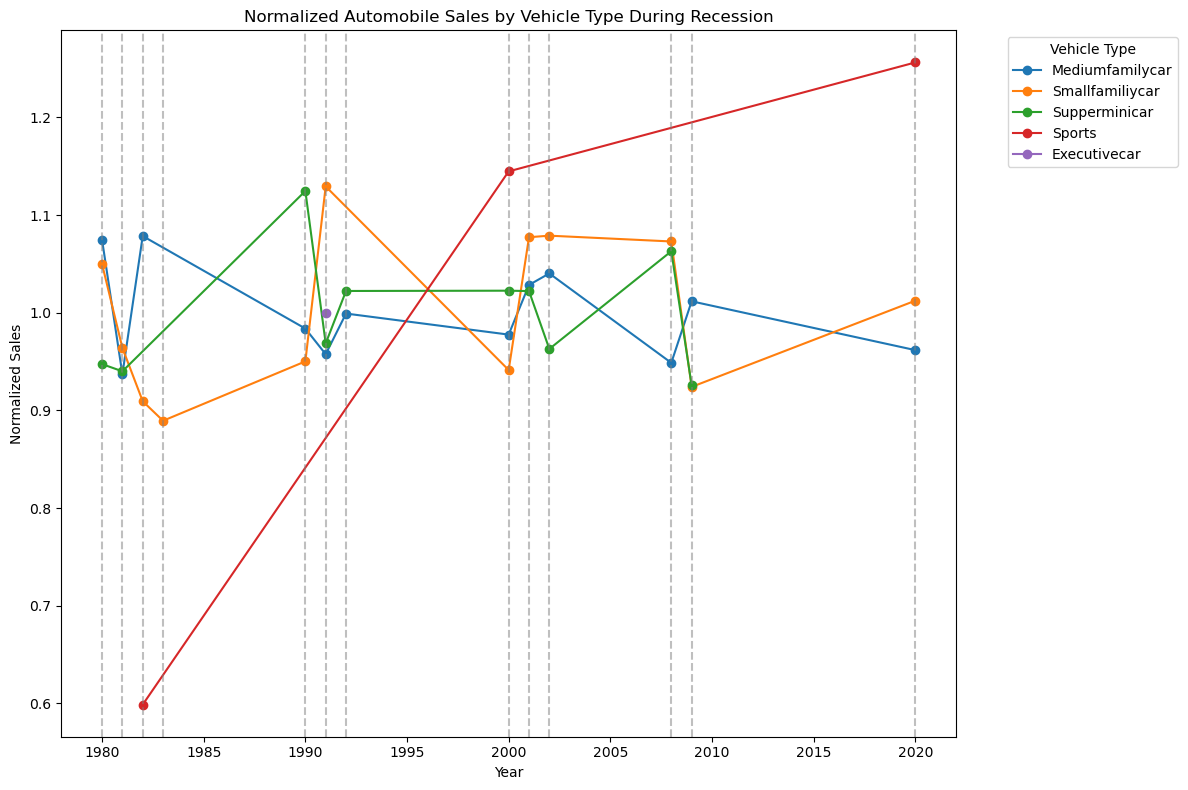

In [30]:
# Assuming 'df' is your dataset
df_rec = df[df['Recession'] == 1]

# Calculate the average automobile sales by year and vehicle type during the recession
df_Mline = df_rec.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()

# Calculate the normalized sales by dividing by the average sales for each vehicle type
df_Mline['Normalized_Sales'] = df_Mline.groupby('Vehicle_Type')['Automobile_Sales'].transform(lambda x: x / x.mean())

# Set the 'Year' as the index
df_Mline.set_index('Year', inplace=True)

# Create the plot for each vehicle type
plt.figure(figsize=(12, 8))
for vehicle_type in df_Mline['Vehicle_Type'].unique():
    data = df_Mline[df_Mline['Vehicle_Type'] == vehicle_type]
    plt.plot(data.index, data['Normalized_Sales'], label=vehicle_type, marker='o')

# Highlight recession years
recession_years = df_rec['Year'].unique()
for year in recession_years:
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)

# Add labels, legend, and title
plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Normalized Sales")
plt.xlabel("Year")
plt.title("Normalized Automobile Sales by Vehicle Type During Recession")

# Show the plot
plt.tight_layout()
plt.show()


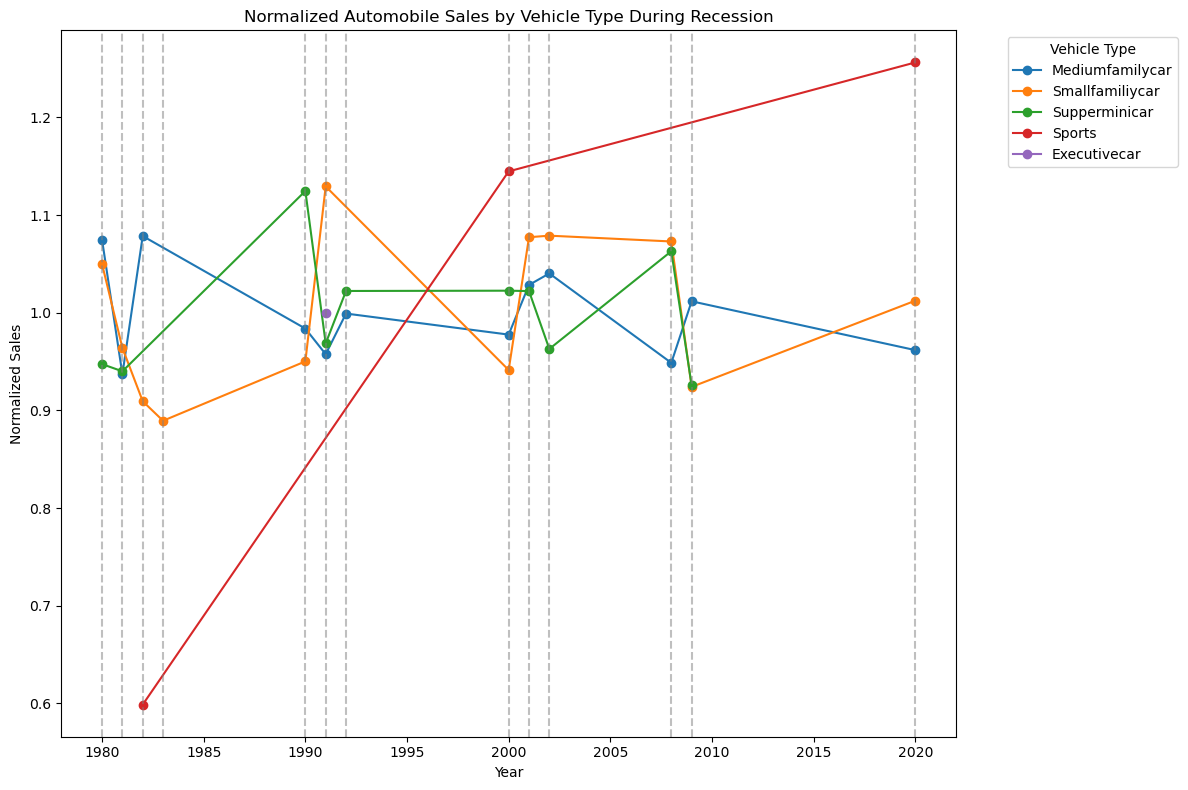

In [32]:
import matplotlib.pyplot as plt

# Assuming 'df' is your dataset
df_rec = df[df['Recession'] == 1]

# Calculate the average automobile sales by year and vehicle type during the recession
df_Mline = df_rec.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()

# Calculate the normalized sales by dividing by the average sales for each vehicle type
df_Mline['Normalized_Sales'] = df_Mline.groupby('Vehicle_Type')['Automobile_Sales'].transform(lambda x: x / x.mean())

# Set the 'Year' as the index
df_Mline.set_index('Year', inplace=True)

# Create the plot for each vehicle type
plt.figure(figsize=(12, 8))
for vehicle_type in df_Mline['Vehicle_Type'].unique():
    data = df_Mline[df_Mline['Vehicle_Type'] == vehicle_type]
    plt.plot(data.index, data['Normalized_Sales'], label=vehicle_type, marker='o')

# Highlight recession years
recession_years = df_rec['Year'].unique()
for year in recession_years:
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)

# Add labels, legend, and title
plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Normalized Sales")
plt.xlabel("Year")
plt.title("Normalized Automobile Sales by Vehicle Type During Recession")

# Save the plot as "Line_Plot_2.png"
plt.savefig('Line_Plot_2.png')
plt.tight_layout()
plt.show()


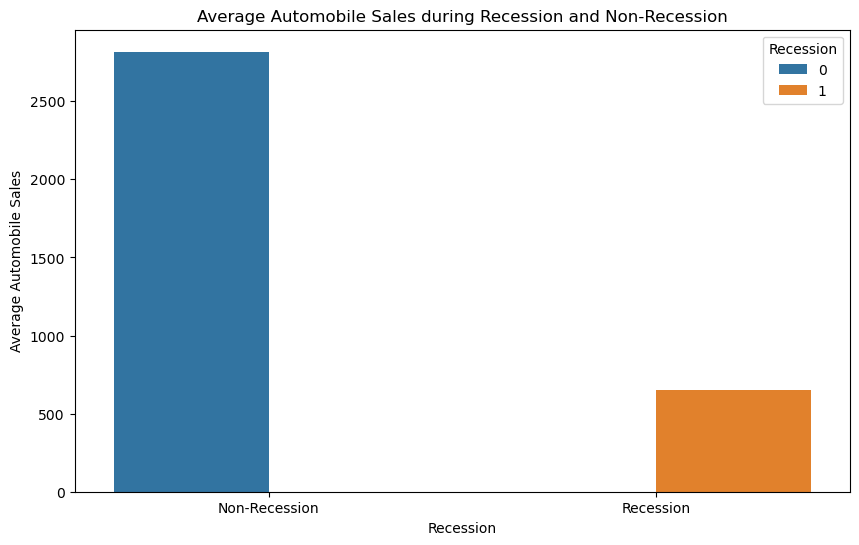

In [34]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

# Create the bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession', data=new_df)
plt.xlabel('Recession')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()


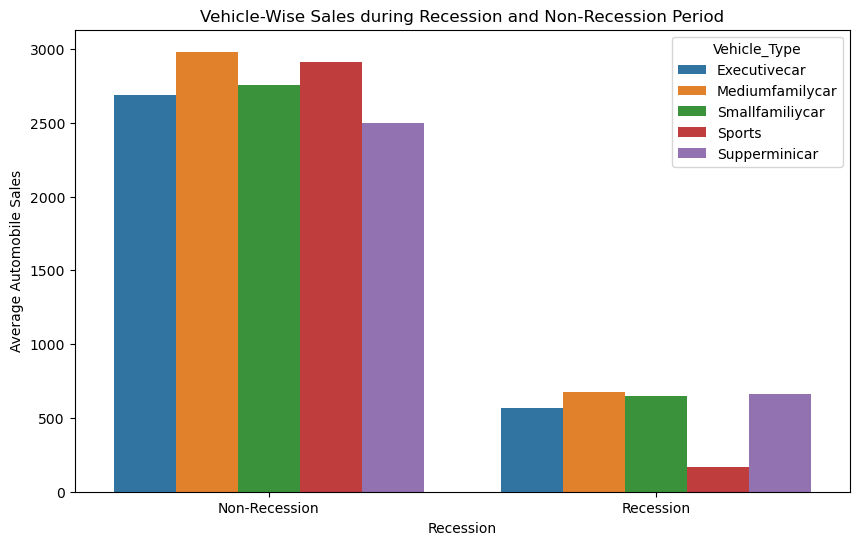

In [36]:
# Filter the data for recessionary periods
recession_data = df[df['Recession'] == 1]

dd = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Calculate the total sales volume by vehicle type during recessions
# sales_by_vehicle_type = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()

# Create the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Recession')
plt.ylabel('Average Automobile Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

plt.show()


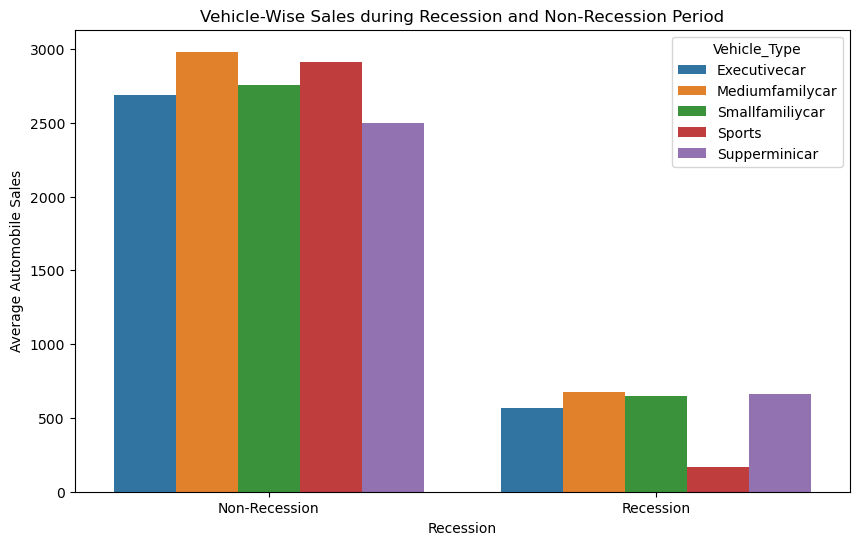

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for recessionary periods
recession_data = df[df['Recession'] == 1]

dd = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Calculate the total sales volume by vehicle type during recessions
# sales_by_vehicle_type = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()

# Create the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Recession')
plt.ylabel('Average Automobile Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

# Save the plot as "Bar_Chart.png"
plt.savefig('Bar_Chart.png')
plt.show()


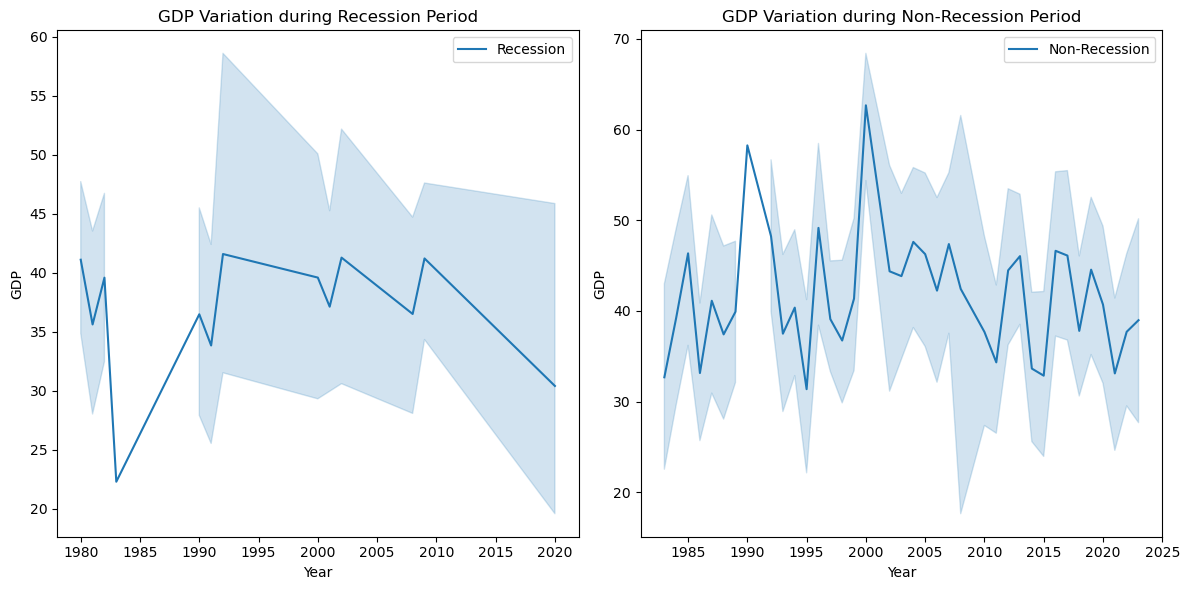

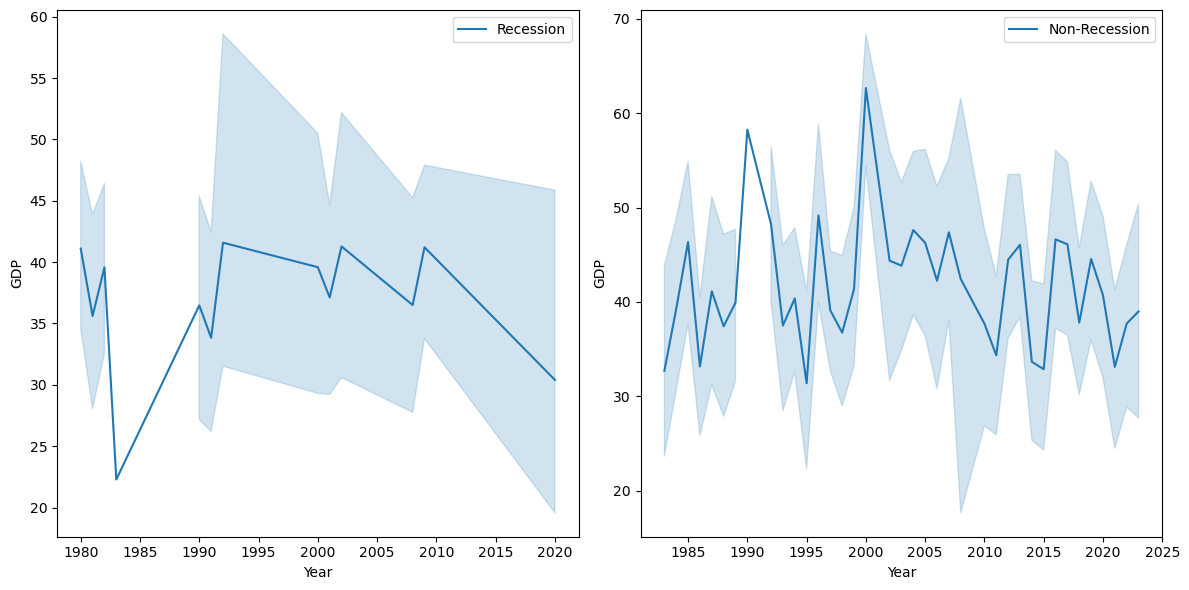

In [42]:
# Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

# Figure
fig = plt.figure(figsize=(12, 6))

# Create different axes for subplotting
ax0 = fig.add_subplot(1, 2, 1)  # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2)  # add subplot 2 (1 row, 2 columns, second plot)

# Plot for recession period
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

# Plot for non-recession period
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')

plt.tight_layout()
plt.show()

# ------------------------------------------------Alternatively--------------
# Using subplot()
plt.figure(figsize=(12, 6))

# Subplot 1
plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()

# Subplot 2
plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()

plt.tight_layout()
plt.show()


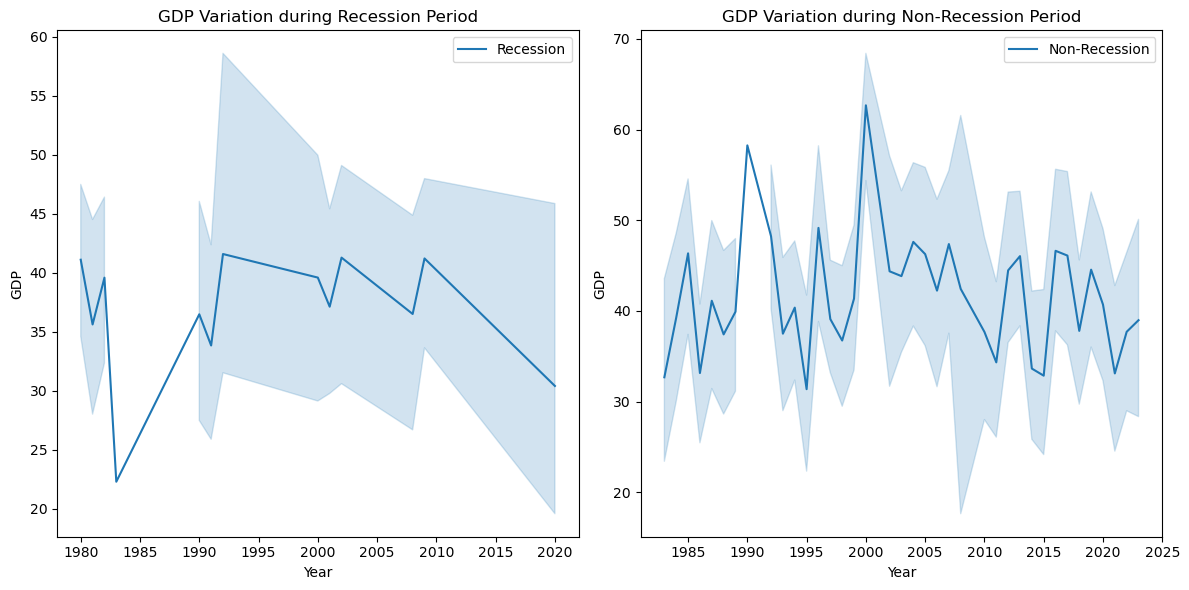

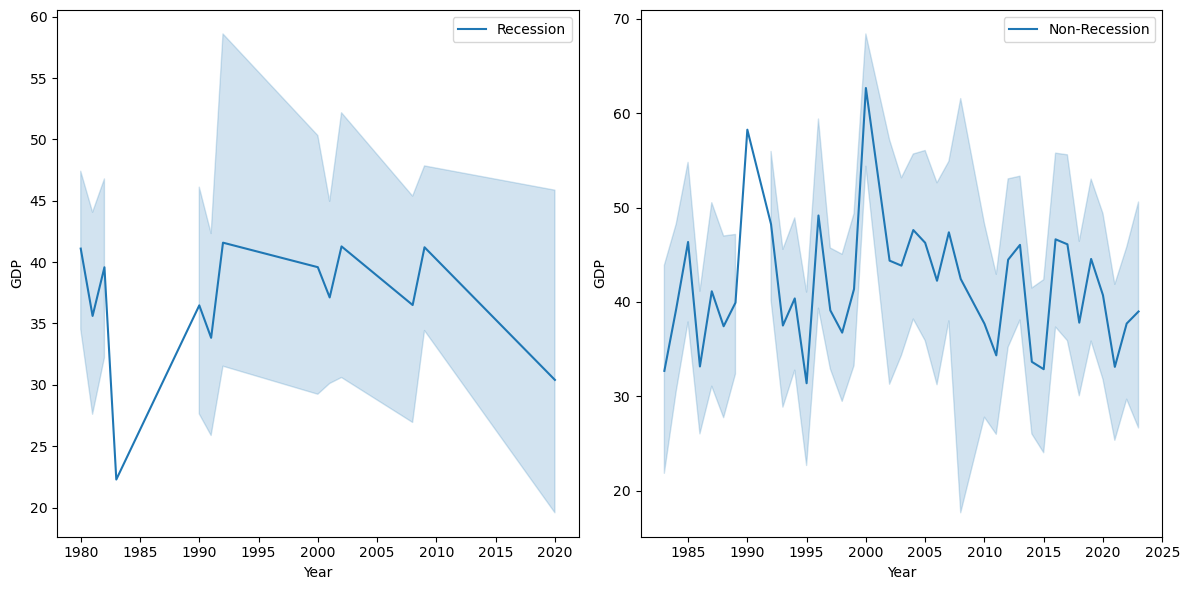

<Figure size 640x480 with 0 Axes>

In [50]:
# Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

# Figure
fig = plt.figure(figsize=(12, 6))

# Create different axes for subplotting
ax0 = fig.add_subplot(1, 2, 1)  # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2)  # add subplot 2 (1 row, 2 columns, second plot)

# Plot for recession period
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

# Plot for non-recession period
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')

plt.tight_layout()
plt.show()

# ------------------------------------------------Alternatively--------------
# Using subplot()
plt.figure(figsize=(12, 6))

# Subplot 1
plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()

# Subplot 2
plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()

plt.tight_layout()
plt.show()
plt.savefig('Subplot.png')

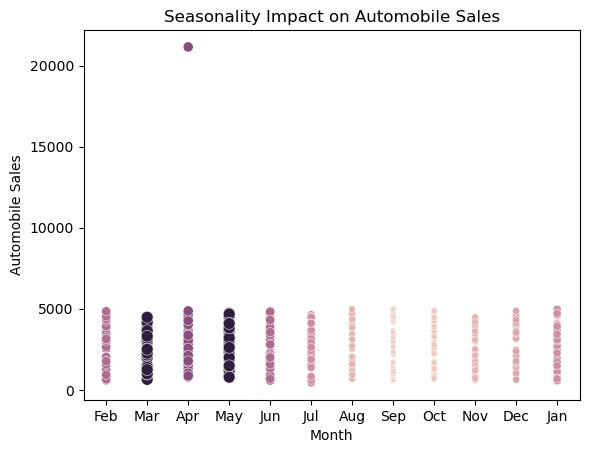

<Figure size 640x480 with 0 Axes>

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

non_rec_data = df[df['Recession'] == 0]  # Filter non-recession data
    
size = non_rec_data['Seasonality_Weight']  # For bubble effect
    
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size, hue='Seasonality_Weight', legend=False)

plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality Impact on Automobile Sales')

plt.show()
plt.savefig('Bubble.png')

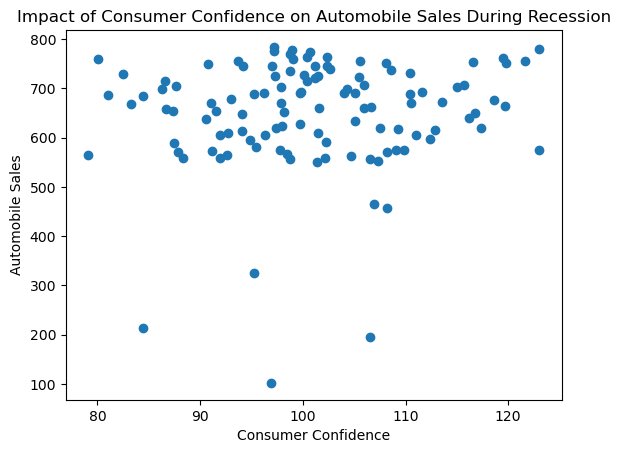

In [54]:
import matplotlib.pyplot as plt

# Create dataframes for recession and non-recession periods
rec_data = df[df['Recession'] == 1]

# Create scatter plot
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])

# Labels and title
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Impact of Consumer Confidence on Automobile Sales During Recession')

# Save the plot as "Scatter.png"
plt.savefig("Scatter.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

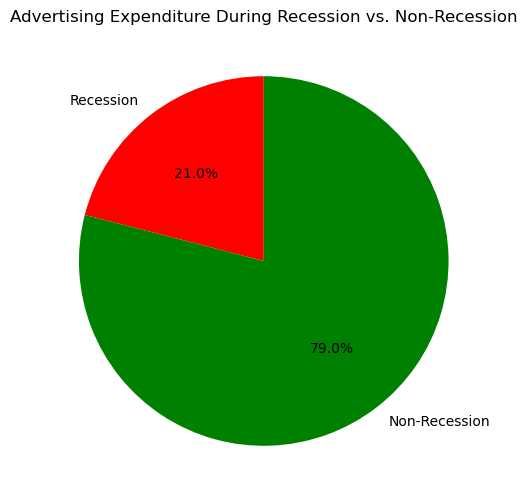

In [56]:
import matplotlib.pyplot as plt

# Filter the data 
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

# Create a pie chart for the advertising expenditure 
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'green'])

plt.title('Advertising Expenditure During Recession vs. Non-Recession')

# Save the plot as "Pie_1.png"
plt.savefig("Pie_1.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


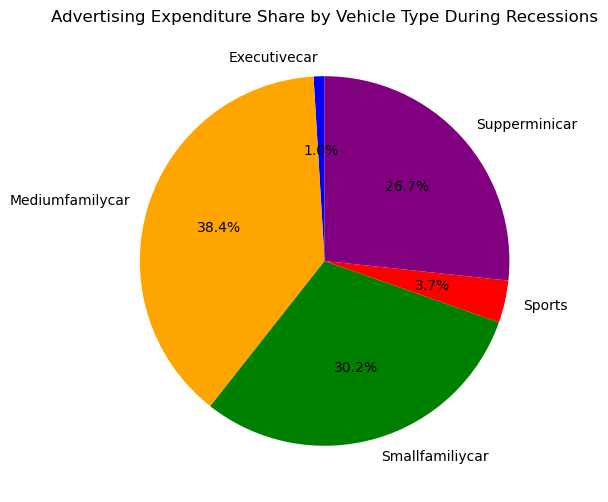

In [58]:
import matplotlib.pyplot as plt

# Filter the data 
Rdata = df[df['Recession'] == 1]

# Calculate the sales volume by vehicle type during recessions
VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create a pie chart for the share of each vehicle type in total expenditure during recessions
plt.figure(figsize=(8, 6))

labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange', 'green', 'red', 'purple'])

plt.title('Advertising Expenditure Share by Vehicle Type During Recessions')

# Save the plot as "Pie_2.png"
plt.savefig("Pie_2.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


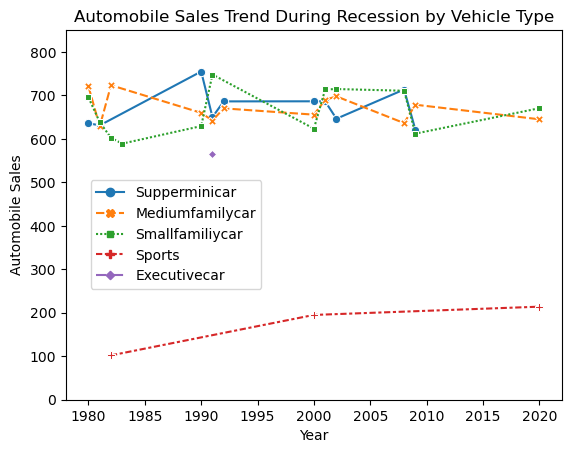

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for recession period
df_rec = df[df['Recession'] == 1]

# Create a line plot showing Automobile Sales over the years during recession, categorized by Vehicle Type
sns.lineplot(data=df_rec, x='Year', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers=True, err_style=None)

# Set y-axis limit
plt.ylim(0, 850)

# Add legend at a specific location
plt.legend(loc=(0.05, 0.3))

# Set plot title and labels
plt.title("Automobile Sales Trend During Recession by Vehicle Type")
plt.xlabel("Year")
plt.ylabel("Automobile Sales")

# Save the plot as "line_plot_3.png"
plt.savefig("line_plot_3.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [6]:
import requests

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
filename = "us-states.json"

try:
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception for bad status codes (4xx or 5xx)

    with open(filename, "wb") as f:
        f.write(response.content)

    print(f"File downloaded successfully to {filename}")

    # Verify the download (optional)
    with open(filename, "r") as f:
        for i, line in enumerate(f):
            if i < 2:  # Print the first two lines
                print(line.strip()) # strip() to remove whitespace
            else:
                break  # Stop after the first two lines

except requests.exceptions.RequestException as e:
    print(f"Error downloading file: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

File downloaded successfully to us-states.json
{"type":"FeatureCollection","features":[
{"type":"Feature","id":"AL","properties":{"name":"Alabama"},"geometry":{"type":"Polygon","coordinates":[[[-87.359296,35.00118],[-85.606675,34.984749],[-85.431413,34.124869],[-85.184951,32.859696],[-85.069935,32.580372],[-84.960397,32.421541],[-85.004212,32.322956],[-84.889196,32.262709],[-85.058981,32.13674],[-85.053504,32.01077],[-85.141136,31.840985],[-85.042551,31.539753],[-85.113751,31.27686],[-85.004212,31.003013],[-85.497137,30.997536],[-87.600282,30.997536],[-87.633143,30.86609],[-87.408589,30.674397],[-87.446927,30.510088],[-87.37025,30.427934],[-87.518128,30.280057],[-87.655051,30.247195],[-87.90699,30.411504],[-87.934375,30.657966],[-88.011052,30.685351],[-88.10416,30.499135],[-88.137022,30.318396],[-88.394438,30.367688],[-88.471115,31.895754],[-88.241084,33.796253],[-88.098683,34.891641],[-88.202745,34.995703],[-87.359296,35.00118]]]}},


In [8]:
import subprocess  # For running shell commands

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
filename = "us-states.json"

try:
    subprocess.run(['wget', url, '-O', filename], check=True)  # Use subprocess

    print(f"File downloaded successfully to {filename}")

    # Verify (optional)
    with open(filename, "r") as f:
        for i, line in enumerate(f):
            if i < 2:
                print(line.strip())
            else:
                break

except subprocess.CalledProcessError as e:
    print(f"Error downloading file using wget: {e}")
except FileNotFoundError:
    print("wget is not installed. Please install it.")
except Exception as e:
    print(f"An error occurred: {e}")

wget is not installed. Please install it.


In [10]:
pip install wget

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9680 sha256=4104c5e46ad203619888068c63b0218f3614271ac729516ee0ee7f46416e44f5
  Stored in directory: c:\users\administrator\appdata\local\pip\cache\wheels\40\b3\0f\a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget
Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd  # Import pandas and give it the alias 'pd'

filename = "us-states.json"  # Or the actual path to your JSON file

try:
    temp = pd.read_json(filename)
    for row in temp["features"]:
        print(row["id"], row["properties"]["name"])

except FileNotFoundError:
    print(f"Error: File '{filename}' not found.")
except KeyError as e:
    print(f"Error: Key '{e}' not found in JSON data. Check the file structure.")
except Exception as e:
    print(f"An error occurred: {e}")

AL Alabama
AK Alaska
AZ Arizona
AR Arkansas
CA California
CO Colorado
CT Connecticut
DE Delaware
FL Florida
GA Georgia
HI Hawaii
ID Idaho
IL Illinois
IN Indiana
IA Iowa
KS Kansas
KY Kentucky
LA Louisiana
ME Maine
MD Maryland
MA Massachusetts
MI Michigan
MN Minnesota
MS Mississippi
MO Missouri
MT Montana
NE Nebraska
NV Nevada
NH New Hampshire
NJ New Jersey
NM New Mexico
NY New York
NC North Carolina
ND North Dakota
OH Ohio
OK Oklahoma
OR Oregon
PA Pennsylvania
RI Rhode Island
SC South Carolina
SD South Dakota
TN Tennessee
TX Texas
UT Utah
VT Vermont
VA Virginia
WA Washington
WV West Virginia
WI Wisconsin
WY Wyoming


In [28]:
import pandas as pd

filename = "us-states.json"

try:
    df = pd.read_json(filename)  # Read the JSON file into a DataFrame
    # Assuming your JSON has a structure where you need to extract city names like this:
    cities = [row["properties"]["name"] for row in df["features"]]
    unique_cities = pd.Series(cities).unique() # Get the unique values
    print(unique_cities)

except FileNotFoundError:
    print(f"Error: File '{filename}' not found.")
except KeyError as e:
    print(f"Error: Key '{e}' not found in JSON data. Check the file structure.")
except Exception as e:
    print(f"An error occurred: {e}")

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


In [36]:
print(df.columns)
print(df.columns.tolist()) # Prints all column names as a list

Index(['type', 'features'], dtype='object')
['type', 'features']
